In [1]:
import win32com.client as win32

# criar a integração com o outlook
outlook = win32.Dispatch('outlook.application')

# criar um email
email = outlook.CreateItem(0)

faturamento = 1500
qtde_produtos = 10
ticket_medio = faturamento / qtde_produtos

# configurar as informações do seu e-mail
email.To = "espeditoa100@gmail.com"
email.Subject = "E-mail automático do Python"
email.HTMLBody = f"""
<p>Olá Lira, aqui é o código Python</p>

<p>O faturamento da loja foi de R${faturamento}</p>
<p>Vendemos {qtde_produtos} produtos</p>
<p>O ticket Médio foi de R${ticket_medio}</p>

<p>Abs,</p>
<p>Código Python</p>
"""

# anexo = "C://Users/joaop/Downloads/arquivo.xlsx"
# email.Attachments.Add(anexo)

email.Send()
print("Email Enviado")

Email Enviado


In [1]:
import pandas as pd
caminho = "C:/Users/esped/OneDrive/2.Contas_casa/2024_Treino_Marombeiros.xlsx"
colunas = ['Data', 'Janaina', 'Espedito']
df_tabela = pd.read_excel(io=caminho, sheet_name='Teste', usecols=colunas)

In [2]:
df_tabela.head(5)

,Data,Janaina,Espedito
0,2023-01-01,-,-
1,2023-01-02,-,-
2,2023-01-03,-,-
3,2023-01-04,-,-
4,2023-01-05,-,-


In [3]:
df_tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      417 non-null    datetime64[ns]
 1   Janaina   417 non-null    object        
 2   Espedito  417 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 9.9+ KB


In [13]:
from datetime import datetime
import numpy as np

# Obtenha a data atual
data_atual = datetime.now()
print("Data Atual:", data_atual)

# Formate a data como string
data_formatada_str = data_atual.strftime("%Y-%m-%d")

# Converta para datetime64[ns]
data_formatada = np.datetime64(data_formatada_str)

print("Data Atual Formatada:", data_formatada)

Data Atual: 2024-01-13 22:18:17.184396
Data Atual Formatada: 2024-01-13


In [60]:
# Mantendo apenas os registros anteriores à data_formatada
df_tabela_filtrada = df_tabela[df_tabela['Data'] < data_formatada]
df_tabela_filtrada.shape


(377, 6)

In [57]:
# df_tabela_filtrada = df_tabela_filtrada[df_tabela_filtrada['Data'] > np.datetime64('2024-01-11')]
# df_tabela_filtrada.shape

(1, 6)

In [61]:
df_tabela_filtrada.head()

,Data,Janaina,Espedito,Dia_Semana,Mes,Ano
0,2023-01-01,-,-,Sunday,January,2023
1,2023-01-02,-,-,Monday,January,2023
2,2023-01-03,-,-,Tuesday,January,2023
3,2023-01-04,-,-,Wednesday,January,2023
4,2023-01-05,-,-,Thursday,January,2023


In [ ]:
df_tabela_filtrada['Dia_Semana'] = df_tabela_filtrada['Data'].dt.day_name()
df_tabela_filtrada['Mes'] = df_tabela_filtrada['Data'].dt.month_name()  
df_tabela_filtrada['Ano'] = df_tabela_filtrada['Data'].dt.year

In [31]:
df_tabela_filtrada.head()

,Data,Janaina,Espedito,Dia_Semana,Mes,Ano
0,2023-01-01,-,-,Sunday,January,2023
1,2023-01-02,-,-,Monday,January,2023
2,2023-01-03,-,-,Tuesday,January,2023
3,2023-01-04,-,-,Wednesday,January,2023
4,2023-01-05,-,-,Thursday,January,2023


In [34]:
df_janaina = df_tabela_filtrada.drop(columns=['Espedito']).rename(columns={'Janaina': 'Status'})
df_janaina['Nome'] = 'Janaina'
df_espedito = df_tabela_filtrada.drop(columns=['Janaina']).rename(columns={'Espedito': 'Status'})
df_espedito['Nome'] = 'Espedito'

In [35]:
df_janaina

,Data,Status,Dia_Semana,Mes,Ano,Nome
0,2023-01-01,-,Sunday,January,2023,Janaina
1,2023-01-02,-,Monday,January,2023,Janaina
2,2023-01-03,-,Tuesday,January,2023,Janaina
3,2023-01-04,-,Wednesday,January,2023,Janaina
4,2023-01-05,-,Thursday,January,2023,Janaina
...,...,...,...,...,...,...
372,2024-01-08,Pago,Monday,January,2024,Janaina
373,2024-01-09,Falha,Tuesday,January,2024,Janaina
374,2024-01-10,Pago,Wednesday,January,2024,Janaina
375,2024-01-11,Pago,Thursday,January,2024,Janaina


In [36]:
# Concatenando os DataFrames ao longo das linhas (eixo 0)
base_dados = pd.concat([df_janaina, df_espedito]).sort_values(by=['Data'])
base_dados.head(30)

,Data,Status,Dia_Semana,Mes,Ano,Nome
0,2023-01-01,-,Sunday,January,2023,Janaina
0,2023-01-01,-,Sunday,January,2023,Espedito
1,2023-01-02,-,Monday,January,2023,Espedito
1,2023-01-02,-,Monday,January,2023,Janaina
2,2023-01-03,-,Tuesday,January,2023,Janaina
2,2023-01-03,-,Tuesday,January,2023,Espedito
3,2023-01-04,-,Wednesday,January,2023,Janaina
3,2023-01-04,-,Wednesday,January,2023,Espedito
4,2023-01-05,-,Thursday,January,2023,Janaina
4,2023-01-05,-,Thursday,January,2023,Espedito


# Analise: Gráfica

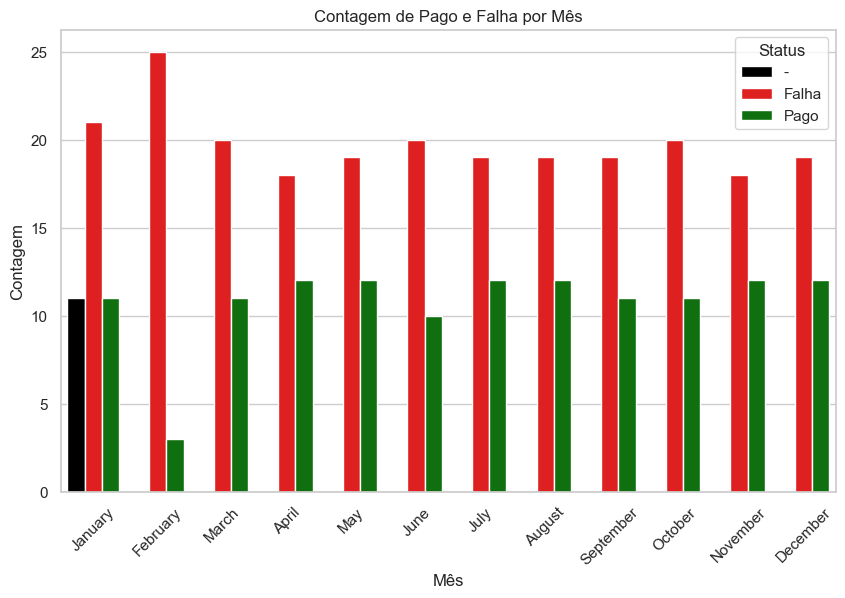

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Usando o Seaborn para criar o gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

cores_personalizadas = {
    '-': 'black',
    'Pago': 'green', 
    'Falha': 'red'}
# Criando o gráfico de barras
sns.countplot(x='Mes', hue='Status', data=base_dados[base_dados['Nome']=='Espedito'], palette=cores_personalizadas)
plt.xticks(rotation=45)
# Adicionando rótulos e título
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.title('Contagem de Pago e Falha por Mês')

# Exibindo o gráfico
plt.show()

In [43]:
base_dados.tail(6)

,Data,Status,Dia_Semana,Mes,Ano,Nome
374,2024-01-10,Pago,Wednesday,January,2024,Espedito
374,2024-01-10,Pago,Wednesday,January,2024,Janaina
375,2024-01-11,Falha,Thursday,January,2024,Espedito
375,2024-01-11,Pago,Thursday,January,2024,Janaina
376,2024-01-12,Falha,Friday,January,2024,Janaina
376,2024-01-12,Falha,Friday,January,2024,Espedito


# Contagem Mês

In [48]:
# Contando os registros com base em Ano, Mes e Espedito
contagem_mes = base_dados.groupby(['Mes', 'Nome', 'Status']).size().reset_index(name='Contagem_mes')
contagem_mes.head()


,Mes,Nome,Status,Contagem_mes
0,April,Espedito,Falha,18
1,April,Espedito,Pago,12
2,April,Janaina,Falha,12
3,April,Janaina,Pago,18
4,August,Espedito,Falha,19


# Contagem Ano

In [51]:
# Contando os registros com base em Ano, Mes e Espedito
contagem_ano = base_dados.groupby(['Ano', 'Nome', 'Status']).size().reset_index(name='Contagem_ano')
contagem_ano

,Ano,Nome,Status,Contagem_ano
0,2023,Espedito,-,11
1,2023,Espedito,Falha,229
2,2023,Espedito,Pago,125
3,2023,Janaina,-,11
4,2023,Janaina,Falha,150
5,2023,Janaina,Pago,204
6,2024,Espedito,Falha,8
7,2024,Espedito,Pago,4
8,2024,Janaina,Falha,5
9,2024,Janaina,Pago,7


# Contagem Status

In [52]:
# Contando os registros com base em Ano, Mes e Espedito
contagem_status = base_dados.groupby(['Nome', 'Status']).size().reset_index(name='Contagem_status')
contagem_status

,Nome,Status,Contagem_status
0,Espedito,-,11
1,Espedito,Falha,237
2,Espedito,Pago,129
3,Janaina,-,11
4,Janaina,Falha,155
5,Janaina,Pago,211
